In [1]:
import pandas as pd
from sklearn import model_selection
import numpy as np

### Exploration of Dataset

In [2]:
df = pd.read_csv("cumulative.csv")

print('number of classes = ', len(df['action'].value_counts()))
print('names of classes  = ', df['action'].value_counts().index.values)
print('\nPercentage of each class in the dataset :\n', [i/len(df)*100 for i in df['action'].value_counts()])
print('\nEach class in the dataset :\n', df['action'].value_counts())

number of classes =  6
names of classes  =  ['walking' 'sit' 'pushups' 'fall' 'walking-with-hands-up' 'actions1']

Percentage of each class in the dataset :
 [34.43654529733884, 24.59890479392833, 17.43923527716399, 12.926313766932463, 7.383033912959938, 3.215966951676434]

Each class in the dataset :
 walking                  14338
sit                      10242
pushups                   7261
fall                      5382
walking-with-hands-up     3074
actions1                  1339
Name: action, dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41636 entries, 0 to 41635
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nose_x           41636 non-null  float64
 1   nose_y           41636 non-null  float64
 2   leftEye_x        41636 non-null  float64
 3   leftEye_y        41636 non-null  float64
 4   rightEye_x       41636 non-null  float64
 5   rightEye_y       41636 non-null  float64
 6   leftEar_x        41636 non-null  float64
 7   leftEar_y        41636 non-null  float64
 8   rightEar_x       41636 non-null  float64
 9   rightEar_y       41636 non-null  float64
 10  leftShoulder_x   41636 non-null  float64
 11  leftShoulder_y   41636 non-null  float64
 12  rightShoulder_x  41636 non-null  float64
 13  rightShoulder_y  41636 non-null  float64
 14  leftElbow_x      41636 non-null  float64
 15  leftElbow_y      41636 non-null  float64
 16  rightElbow_x     41636 non-null  float64
 17  rightElbow_y

##### We can see only 6 since there is clash in naming 
For example there are two videos ending with **"sit"** and the above is a result of only unique values

In [4]:
sss = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# the for loop is for when we want to see the index of train and test from one or more splits
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [25329 20537  1139 ... 35022  8445 25337] TEST: [11065  9010 26676 ... 40370 34525 15994]


In [5]:
print('Percentage of each class after split :\n', [i/len(y_train)*100 for i in y_train.value_counts()])

Percentage of each class after split :
 [34.436171490332654, 24.597694247628198, 17.44025459349105, 12.927825147111804, 7.38261078419599, 3.2154437372403026]


### We can observe that the percentage of class is preserved
Moving ahead we could choose to **downsample** the data so all can match with the lowest data we have or **upsample** and create new data so as to match with the highest data sample we have

##### The below two blocks of code are to provide a base to compare DL models to ML model (Random Forest)

# Random Forest Classifier (RFC)

In [ ]:
# Applying Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_features=None, n_jobs=-1, verbose=3,)
params = {'criterion' : ['gini', 'entropy'],
          'n_estimators' : [10, 100, 1000, 10000]}

model = GridSearchCV(rfc, params).fit(X_train, y_train)
print('Best estimator = ', model.best_estimator_,'\nBest score = ',model.best_score_,'\nBest Params =',model.best_params_)

In [6]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import pickle

filename = "RFC.pickle"
#pickle.dump(model, open(filename, "wb"))

model = pickle.load(open(filename, 'rb'))

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.2s finished


array([[ 268,    0,    0,    0,    0,    0],
       [   0, 1066,    6,    2,    2,    0],
       [   0,    1, 1450,    1,    0,    0],
       [   0,    3,    1, 2040,    5,    0],
       [   0,    0,    0,    0, 2868,    0],
       [   0,    0,    0,    0,    0,  615]], dtype=int64)

In [7]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[8060,    0],
        [   0,  268]],

       [[7248,    4],
        [  10, 1066]],

       [[6869,    7],
        [   2, 1450]],

       [[6276,    3],
        [   9, 2040]],

       [[5453,    7],
        [   0, 2868]],

       [[7713,    0],
        [   0,  615]]], dtype=int64)

# Artificial Neural Network

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(df.iloc[:, -1].values.reshape(-1,1))
df["Transformed"] = enc.transform(df.iloc[:, -1].values.reshape(-1,1))
df['Transformed'] = df['Transformed'].astype('category')

enc.classes_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['actions1', 'fall', 'pushups', 'sit', 'walking',
       'walking-with-hands-up'], dtype=object)

In [9]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [10]:
# tf.__version__ = 1.14.0

#x = tf.placeholder(dtype = tf.float32, shape = [34,1])
#y = tf.placeholder(dtype = tf.int32, shape = [None])


model = tf.keras.Sequential([tf.keras.layers.Dense(1024, activation="relu", name="Dense_1", 
                                                   input_dim=df.T.iloc[:-2, 1].values.reshape(-1, 1).shape[0]),
                             tf.keras.layers.BatchNormalization(name="Batch_Norm"),
                             tf.keras.layers.Dense(720, activation="relu", name="Dense_2"),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(480, activation="relu", name="Dense_3"),
                             tf.keras.layers.Dense(360, activation="relu", name="Dense_4"),
                             tf.keras.layers.Dense(len(enc.classes_), activation="softmax", name="Dense_OP")])
#print(model.weights)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 1024)              35840     
_________________________________________________________________
Batch_Norm (BatchNormalizati (None, 1024)              4096      
_________________________________________________________________
Dense_2 (Dense)              (None, 720)               738000    
_________________________________________________________________
dropout (Dropout)            (None, 720)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 480)               346080    
_________________________________________________________________
Dense_4 (Dense)              (None, 360)               173160    
____

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit_transform(df['action'].values.reshape(-1,1))

y_train = ohe.transform(df['action'][train_index].values.reshape(-1,1)).toarray()
y_test = ohe.transform(df['action'][test_index].values.reshape(-1,1)).toarray()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=64, epochs=200, verbose=1)
model.save('ANN', save_format='h5')

Train on 33308 samples, validate on 8328 samples
Epoch 1/200
33308/33308 [==============================] - 3s 92us/sample - loss: 0.3985 - acc: 0.8592 - val_loss: 0.8280 - val_acc: 0.7018
Epoch 2/200
33308/33308 [==============================] - 2s 71us/sample - loss: 0.2694 - acc: 0.9052 - val_loss: 2.6633 - val_acc: 0.3582
Epoch 3/200
33308/33308 [==============================] - 2s 70us/sample - loss: 0.2198 - acc: 0.9208 - val_loss: 0.5901 - val_acc: 0.7930
Epoch 4/200
33308/33308 [==============================] - 2s 67us/sample - loss: 0.1950 - acc: 0.9303 - val_loss: 0.3433 - val_acc: 0.8762
Epoch 5/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.1641 - acc: 0.9420 - val_loss: 0.3632 - val_acc: 0.8915
Epoch 6/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.1507 - acc: 0.9471 - val_loss: 0.1836 - val_acc: 0.9348
Epoch 7/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.1294 - acc: 0.9526 - val_lo

Epoch 59/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.0363 - acc: 0.9880 - val_loss: 0.2326 - val_acc: 0.9289
Epoch 60/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.0358 - acc: 0.9887 - val_loss: 0.0411 - val_acc: 0.9875
Epoch 61/200
33308/33308 [==============================] - 2s 67us/sample - loss: 0.0323 - acc: 0.9894 - val_loss: 0.1106 - val_acc: 0.9597
Epoch 62/200
33308/33308 [==============================] - 2s 67us/sample - loss: 0.0338 - acc: 0.9885 - val_loss: 0.1676 - val_acc: 0.9388
Epoch 63/200
33308/33308 [==============================] - 2s 67us/sample - loss: 0.0278 - acc: 0.9905 - val_loss: 0.1153 - val_acc: 0.9649
Epoch 64/200
33308/33308 [==============================] - 2s 67us/sample - loss: 0.0360 - acc: 0.9878 - val_loss: 0.0474 - val_acc: 0.9869
Epoch 65/200
33308/33308 [==============================] - 2s 67us/sample - loss: 0.0325 - acc: 0.9896 - val_loss: 0.1140 - val_acc: 0.9672
Epoch 66/200


Epoch 117/200
33308/33308 [==============================] - 2s 65us/sample - loss: 0.0291 - acc: 0.9914 - val_loss: 0.0501 - val_acc: 0.9826
Epoch 118/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.0221 - acc: 0.9935 - val_loss: 0.0103 - val_acc: 0.9969
Epoch 119/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.0249 - acc: 0.9925 - val_loss: 0.0239 - val_acc: 0.9917
Epoch 120/200
33308/33308 [==============================] - 2s 65us/sample - loss: 0.0265 - acc: 0.9922 - val_loss: 0.0566 - val_acc: 0.9821
Epoch 121/200
33308/33308 [==============================] - 2s 64us/sample - loss: 0.0245 - acc: 0.9923 - val_loss: 0.0184 - val_acc: 0.9951
Epoch 122/200
33308/33308 [==============================] - 2s 64us/sample - loss: 0.0233 - acc: 0.9924 - val_loss: 0.0107 - val_acc: 0.9969
Epoch 123/200
33308/33308 [==============================] - 2s 65us/sample - loss: 0.0226 - acc: 0.9931 - val_loss: 0.5308 - val_acc: 0.8774
Epoch 

Epoch 175/200
33308/33308 [==============================] - 2s 70us/sample - loss: 0.0226 - acc: 0.9932 - val_loss: 0.0333 - val_acc: 0.9876
Epoch 176/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.0189 - acc: 0.9948 - val_loss: 0.0221 - val_acc: 0.9929
Epoch 177/200
33308/33308 [==============================] - 2s 67us/sample - loss: 0.0267 - acc: 0.9925 - val_loss: 0.0150 - val_acc: 0.9953
Epoch 178/200
33308/33308 [==============================] - 2s 72us/sample - loss: 0.0194 - acc: 0.9943 - val_loss: 0.0290 - val_acc: 0.9918
Epoch 179/200
33308/33308 [==============================] - 2s 68us/sample - loss: 0.0223 - acc: 0.9933 - val_loss: 0.0862 - val_acc: 0.9739
Epoch 180/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.0293 - acc: 0.9917 - val_loss: 0.0116 - val_acc: 0.9974
Epoch 181/200
33308/33308 [==============================] - 2s 66us/sample - loss: 0.0222 - acc: 0.9933 - val_loss: 0.0324 - val_acc: 0.9899
Epoch 

In [12]:
pd.DataFrame(model.predict(df.iloc[[1,40000,10000], :-2])*100, columns=ohe.categories_)

,actions1,fall,pushups,sit,walking,walking-with-hands-up
0,1.216099e-12,1.445600e-05,9.999996e+01,2.815589e-05,2.647200e-10,0.000000e+00
1,4.219005e-08,1.703904e+00,5.082090e-07,2.120696e-01,9.808403e+01,7.919475e-17
2,4.687350e-15,7.634088e-20,9.881274e-21,2.648890e-12,1.000000e+02,3.231460e-08


In [14]:
with open('OneHotEncoding categories.txt', 'w') as f:
    f.write(str(ohe.categories_[0]))

In [15]:
str(ohe.categories_[0])

"['actions1' 'fall' 'pushups' 'sit' 'walking' 'walking-with-hands-up']"


Bad key "text.kerning_factor" on line 4 in
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


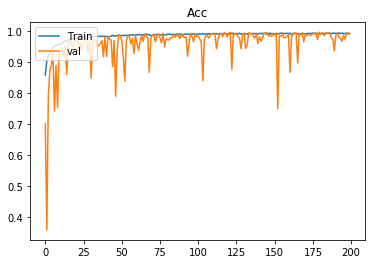

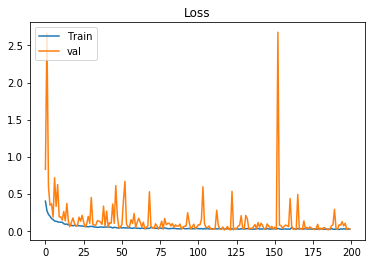

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])
plt.title('Acc')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

In [18]:
model.predict_classes(df.iloc[1:2, :-2])

array([2], dtype=int64)

In [19]:
df["Transformed"] = df["Transformed"].astype('int64')

In [20]:
confusion_matrix(df['Transformed'][test_index], model.predict_classes(df.iloc[:, :-2])[test_index])

array([[ 268,    0,    0,    0,    0,    0],
       [   0, 1065,    9,    2,    0,    0],
       [   0,    2, 1450,    0,    0,    0],
       [   0,   25,    0, 2020,    4,    0],
       [   0,    5,    0,   11, 2852,    0],
       [   0,    0,    0,    2,    0,  613]], dtype=int64)

# Convolutional neural Network (CNN)

In [110]:
from tqdm import tqdm
import scipy.stats as stats

X_CNN = []
Y_CNN = []
# Since its 30 frames per second
seconds = 4
buffer_size = seconds*30 
shift_size = 30

# Number of Features = 34
for i in tqdm(range(0, (df.shape[0]-buffer_size), shift_size)):
    X_frame = np.zeros((buffer_size,34))
    for j in range(34):
        X_frame[:,j] = df.iloc[:, :-2].values[:,j] [i:i+buffer_size]
    label = stats.mode(df.iloc[:, -2].values[i:i+buffer_size])[0][0]
    X_CNN.append(X_frame)
    Y_CNN.append(label)

X_CNN = np.asarray(X_CNN).reshape(-1,buffer_size,34)
Y_CNN = np.asarray(Y_CNN)
X_CNN.shape, Y_CNN.shape

100%|██████████████████████████████████████████████████████████████████████████████| 1384/1384 [04:30<00:00,  5.11it/s]


((1384, 120, 34), (1384,))

In [111]:
# Necessary modifications for CNN
X_CNN = X_CNN.reshape(X_CNN.shape[0],
                      X_CNN.shape[1],
                      X_CNN.shape[2],
                      1)
X_CNN.shape

(1384, 120, 34, 1)

In [112]:
sss = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in sss.split(X_CNN, Y_CNN):
    print("TRAIN shape : ", train_index.shape, "\nTEST shape : ", test_index.shape)

TRAIN shape :  (1107,) 
TEST shape :  (277,)


In [118]:
model_CNN = tf.keras.Sequential([tf.keras.layers.Conv2D(64, kernel_size=(2,2), activation="relu", name="Conv_1",
                                                        input_shape=X_CNN[0].shape),
                                 tf.keras.layers.Conv2D(64, kernel_size=(2,2), activation="relu", name="Conv_2"),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(32, activation="relu", name="Dense_1"),
                                 tf.keras.layers.Dense(32, activation="relu", name="Dense_2"),
                                 tf.keras.layers.Dense(len(enc.classes_), activation="softmax", name="Dense_OP")])
#print(model.weights)
model_CNN.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 119, 33, 64)       320       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 118, 32, 64)       16448     
_________________________________________________________________
flatten_4 (Flatten)          (None, 241664)            0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                7733280   
_________________________________________________________________
Dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
Dense_OP (Dense)             (None, 6)                 198       
Total params: 7,751,302
Trainable params: 7,751,302
Non-trainable params: 0
____________________________________________

In [119]:
history_CNN = model_CNN.fit(X_CNN[train_index], ohe.transform(Y_CNN[train_index].reshape(-1,1)).toarray(),
                            validation_data=(X_CNN[test_index], ohe.transform(Y_CNN[test_index].reshape(-1,1)).toarray()), 
                            batch_size=64, epochs=200, verbose=1)
model_CNN.save('CNN', save_format='h5')

Train on 1107 samples, validate on 277 samples
Epoch 1/200
1107/1107 [==============================] - 10s 9ms/sample - loss: 316.5492 - acc: 0.2954 - val_loss: 3.0067 - val_acc: 0.3827
Epoch 2/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 1.7262 - acc: 0.3857 - val_loss: 1.3874 - val_acc: 0.5957
Epoch 3/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 1.1583 - acc: 0.6287 - val_loss: 1.3833 - val_acc: 0.6245
Epoch 4/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.9993 - acc: 0.6992 - val_loss: 1.3397 - val_acc: 0.5884
Epoch 5/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.9376 - acc: 0.7516 - val_loss: 1.1177 - val_acc: 0.6715
Epoch 6/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.8062 - acc: 0.7696 - val_loss: 1.1720 - val_acc: 0.6968
Epoch 7/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.7259 - acc: 0.7922 - val_loss: 1.1496 - val_acc

1107/1107 [==============================] - 1s 1ms/sample - loss: 0.1819 - acc: 0.9603 - val_loss: 5.3662 - val_acc: 0.7617
Epoch 61/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.1734 - acc: 0.9530 - val_loss: 4.9651 - val_acc: 0.7292
Epoch 62/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.1387 - acc: 0.9512 - val_loss: 5.2310 - val_acc: 0.7256
Epoch 63/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.1732 - acc: 0.9494 - val_loss: 5.5387 - val_acc: 0.7437
Epoch 64/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.0993 - acc: 0.9720 - val_loss: 5.4939 - val_acc: 0.7473
Epoch 65/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.0948 - acc: 0.9729 - val_loss: 5.1510 - val_acc: 0.7365
Epoch 66/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 0.0609 - acc: 0.9883 - val_loss: 5.3371 - val_acc: 0.7365
Epoch 67/200
1107/1107 [=======================

1107/1107 [==============================] - 1s 1ms/sample - loss: 4.4810e-05 - acc: 1.0000 - val_loss: 6.4687 - val_acc: 0.7906
Epoch 119/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 4.4006e-05 - acc: 1.0000 - val_loss: 6.4725 - val_acc: 0.7906
Epoch 120/200
1107/1107 [==============================] - 2s 1ms/sample - loss: 4.2423e-05 - acc: 1.0000 - val_loss: 6.4840 - val_acc: 0.7906
Epoch 121/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 4.1381e-05 - acc: 1.0000 - val_loss: 6.5037 - val_acc: 0.7906
Epoch 122/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 4.1181e-05 - acc: 1.0000 - val_loss: 6.5157 - val_acc: 0.7906
Epoch 123/200
1107/1107 [==============================] - 2s 1ms/sample - loss: 4.1572e-05 - acc: 1.0000 - val_loss: 6.4997 - val_acc: 0.7906
Epoch 124/200
1107/1107 [==============================] - 2s 1ms/sample - loss: 3.8443e-05 - acc: 1.0000 - val_loss: 6.5506 - val_acc: 0.7870
Epoch 125/200

1107/1107 [==============================] - 1s 1ms/sample - loss: 1.3663e-05 - acc: 1.0000 - val_loss: 6.9750 - val_acc: 0.7870
Epoch 176/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 1.3390e-05 - acc: 1.0000 - val_loss: 6.9941 - val_acc: 0.7906
Epoch 177/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 1.3161e-05 - acc: 1.0000 - val_loss: 6.9989 - val_acc: 0.7870
Epoch 178/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 1.2858e-05 - acc: 1.0000 - val_loss: 7.0047 - val_acc: 0.7906
Epoch 179/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 1.2678e-05 - acc: 1.0000 - val_loss: 7.0178 - val_acc: 0.7906
Epoch 180/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 1.2491e-05 - acc: 1.0000 - val_loss: 7.0192 - val_acc: 0.7906
Epoch 181/200
1107/1107 [==============================] - 1s 1ms/sample - loss: 1.2261e-05 - acc: 1.0000 - val_loss: 7.0194 - val_acc: 0.7906
Epoch 182/200

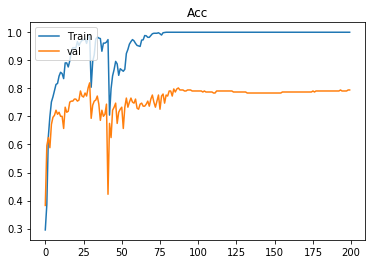

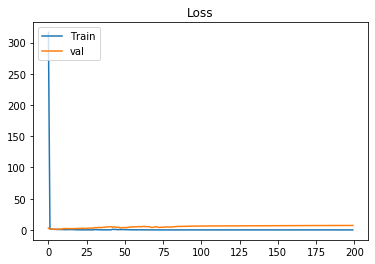

In [120]:
plt.plot(history_CNN.epoch, history_CNN.history['acc'])
plt.plot(history_CNN.epoch, history_CNN.history['val_acc'])
plt.title('Acc')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

plt.plot(history_CNN.epoch, history_CNN.history['loss'])
plt.plot(history_CNN.epoch, history_CNN.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

# RNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report 
print('\nClassification Report\n')

print('\nAccuracy of Random Forest Classifier (RFC): {:.2f}\n'.format(accuracy_score(y_test, ohe.transform(y_pred.reshape(-1,1)).toarray())))    
print(classification_report(ohe.transform(y_pred.reshape(-1,1)).toarray(), y_test, target_names=ohe.categories_[0]))

print('\nAccuracy of Artificial Neural Network (ANN): {:.2f}\n'.format(accuracy_score(df['Transformed'][test_index], model.predict_classes(df.iloc[:, :-2])[test_index])))
print(classification_report(df['Transformed'][test_index], model.predict_classes(df.iloc[:, :-2])[test_index], target_names=ohe.categories_[0]))

In [ ]:
df.iloc[1, :-2].values